In [165]:
import pandas as pd
import numpy as np
import datetime

import warnings
warnings.filterwarnings('ignore')

data_path = "data.csv"
date_cero = pd.to_datetime(1490195805, unit='s') - pd.to_datetime(1490195805, unit='s')

# Analisis de los datos

In [166]:
df = pd.read_csv(data_path)

df['Planned_Delivery_Start_Date'] = pd.to_datetime(df['Planned_Delivery_Start_Date'])
df['Planned_Delivery_End_Date'] = pd.to_datetime(df['Planned_Delivery_End_Date'])
df['Opportunity_Created_Date'] = pd.to_datetime(df['Opportunity_Created_Date'])
df['Last_Modified_Date'] = pd.to_datetime(df['Last_Modified_Date'])

In [167]:
df.shape

(16947, 52)

In [168]:
df.describe()

,ID,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Opportunity_ID,ASP,ASP_(converted),Delivery_Year,TRF,Total_Amount,Total_Taxable_Amount
count,16947.000000,16947.000000,16947.000000,16947.000000,16947.000000,16947.0,16947.000000,13738.000000,13738.000000,16947.000000,16947.000000,1.688800e+04,1.694700e+04
mean,17666.650440,0.807990,0.583584,0.475482,0.318876,0.0,5335.940225,7.012128,0.432554,2017.137428,2.338172,1.993659e+06,3.224117e+06
std,6940.859372,0.393893,0.492979,0.499413,0.466055,0.0,3324.723809,18.858359,0.758659,0.829603,12.169339,1.848426e+07,2.030360e+07
min,4854.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,2016.000000,0.000000,0.000000e+00,0.000000e+00
25%,11953.000000,1.000000,0.000000,0.000000,0.000000,0.0,2448.500000,0.360000,0.373260,2016.000000,0.000000,2.677500e+04,8.546580e+04
50%,18114.000000,1.000000,1.000000,0.000000,0.000000,0.0,5306.000000,0.400000,0.412850,2017.000000,0.000000,1.072500e+05,3.760672e+05
75%,23845.500000,1.000000,1.000000,1.000000,1.000000,0.0,7698.000000,0.505000,0.476490,2018.000000,1.000000,4.603898e+05,1.037450e+06
max,28773.000000,1.000000,1.000000,1.000000,1.000000,0.0,12803.000000,80.000000,67.000000,2020.000000,500.000000,1.320000e+09,1.356339e+09


In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16947 entries, 0 to 16946
Data columns (total 52 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   ID                                  16947 non-null  int64         
 1   Region                              16947 non-null  object        
 2   Territory                           16947 non-null  object        
 3   Pricing, Delivery_Terms_Quote_Appr  16947 non-null  int64         
 4   Pricing, Delivery_Terms_Approved    16947 non-null  int64         
 5   Bureaucratic_Code_0_Approval        16947 non-null  int64         
 6   Bureaucratic_Code_0_Approved        16947 non-null  int64         
 7   Submitted_for_Approval              16947 non-null  int64         
 8   Bureaucratic_Code                   16947 non-null  object        
 9   Account_Created_Date                16947 non-null  object        
 10  Source                

In [170]:
df.head()

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,...,Q2,2016,NaT,10,EUR,5272800.0,EUR,5272800.0,Closed Lost,Prod_Category_A_None
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,...,Q1,2016,NaT,0,EUR,48230.0,EUR,48230.0,Closed Won,Prod_Category_A_None
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,...,Q1,2016,NaT,0,USD,83865.6,USD,83865.6,Closed Won,Prod_Category_A_None
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2018,NaT,14,USD,7421881.5,USD,7421881.5,Closed Lost,Prod_Category_A_None
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2018,NaT,25,USD,13357192.5,USD,13357192.5,Closed Lost,Prod_Category_A_None


In [171]:
df.dtypes.value_counts()

object            35
int64              9
datetime64[ns]     4
float64            4
dtype: int64

In [172]:
df['Stage'].value_counts()

Closed Won       9533
Closed Lost      7350
Proposal           35
Negotiation        18
Qualification      11
Name: Stage, dtype: int64

# Desarrollo del analisis

Haciendo el analisis en el pipeline, evaluamos en funcion de las oportunidades que terminaron ya sean 'Closed Lost' como 'Closed Won' y con estos vemos tanto las fechas pactadas de delivery con la ultima modificacion y su fecha de creacion, tambien lo agrupamos por region y analizamos tambien la media de esto en 'TRF'.

In [173]:
df_fin = df[(df['Stage'] == 'Closed Lost') | (df['Stage'] == 'Closed Won')]\
[['Planned_Delivery_Start_Date', 'Planned_Delivery_End_Date', 'Opportunity_Created_Date', 'Stage', 'TRF', 'Last_Modified_Date', 'Region', 'Territory', 'Total_Taxable_Amount', 'ASP']]

df_fin

,Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Opportunity_Created_Date,Stage,TRF,Last_Modified_Date,Region,Territory,Total_Taxable_Amount,ASP
0,2016-05-01,2016-06-30,2015-12-07,Closed Lost,10,2016-06-13,EMEA,None,5272800.0,0.5200
1,2016-01-18,2016-01-20,2015-12-07,Closed Won,0,2016-01-15,EMEA,None,48230.0,0.5300
2,2016-01-25,2016-01-25,2015-12-08,Closed Won,0,2016-09-29,Americas,NW America,83865.6,0.4800
3,2018-02-01,2018-03-31,2015-12-08,Closed Lost,14,2018-03-27,Americas,NW America,7421881.5,0.5300
4,2018-02-01,2018-02-28,2015-12-08,Closed Lost,25,2018-03-27,Americas,NW America,13357192.5,0.5300
...,...,...,...,...,...,...,...,...,...,...
16942,2016-03-21,2016-03-25,2015-12-04,Closed Won,0,2016-01-19,EMEA,Austria,299715.0,0.5200
16943,2016-04-04,2016-04-08,2015-12-04,Closed Won,0,2016-01-19,EMEA,Austria,299715.0,0.5200
16944,2016-03-28,2016-03-31,2015-12-04,Closed Won,0,2016-01-19,EMEA,Austria,299715.0,0.5200
16945,2016-04-25,2016-04-29,2015-12-05,Closed Lost,4,2016-01-22,Americas,NE America,0.0,0.6375


In [174]:
df_fin['time_modified_diff'] = df_fin['Planned_Delivery_Start_Date'] - df_fin['Opportunity_Created_Date']
df_fin['time_modified_diff'] = df_fin['time_modified_diff'].dt.days
df_fin['after_time'] = (df_fin['Planned_Delivery_End_Date'] - df_fin['Last_Modified_Date']).dt.days
df_fin['ahead_of_time'] = (df_fin['Planned_Delivery_Start_Date'] - df_fin['Last_Modified_Date']).dt.days

df_fin.head()

,Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Opportunity_Created_Date,Stage,TRF,Last_Modified_Date,Region,Territory,Total_Taxable_Amount,ASP,time_modified_diff,after_time,ahead_of_time
0,2016-05-01,2016-06-30,2015-12-07,Closed Lost,10,2016-06-13,EMEA,None,5272800.0,0.52,146,17.0,-43
1,2016-01-18,2016-01-20,2015-12-07,Closed Won,0,2016-01-15,EMEA,None,48230.0,0.53,42,5.0,3
2,2016-01-25,2016-01-25,2015-12-08,Closed Won,0,2016-09-29,Americas,NW America,83865.6,0.48,48,-248.0,-248
3,2018-02-01,2018-03-31,2015-12-08,Closed Lost,14,2018-03-27,Americas,NW America,7421881.5,0.53,786,4.0,-54
4,2018-02-01,2018-02-28,2015-12-08,Closed Lost,25,2018-03-27,Americas,NW America,13357192.5,0.53,786,-27.0,-54


In [175]:
modified = []
j = 0
for v in df_fin['ahead_of_time']:
    actual = df_fin['after_time'].iloc[j]
    if v>0:
        modified.append('Antes')
    elif actual<0:
        modified.append('Despues')
    else:
        modified.append('Durante')
    j+=1
df_fin['modified_in_time'] = modified
df_fin

,Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Opportunity_Created_Date,Stage,TRF,Last_Modified_Date,Region,Territory,Total_Taxable_Amount,ASP,time_modified_diff,after_time,ahead_of_time,modified_in_time
0,2016-05-01,2016-06-30,2015-12-07,Closed Lost,10,2016-06-13,EMEA,None,5272800.0,0.5200,146,17.0,-43,Durante
1,2016-01-18,2016-01-20,2015-12-07,Closed Won,0,2016-01-15,EMEA,None,48230.0,0.5300,42,5.0,3,Antes
2,2016-01-25,2016-01-25,2015-12-08,Closed Won,0,2016-09-29,Americas,NW America,83865.6,0.4800,48,-248.0,-248,Despues
3,2018-02-01,2018-03-31,2015-12-08,Closed Lost,14,2018-03-27,Americas,NW America,7421881.5,0.5300,786,4.0,-54,Durante
4,2018-02-01,2018-02-28,2015-12-08,Closed Lost,25,2018-03-27,Americas,NW America,13357192.5,0.5300,786,-27.0,-54,Despues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16942,2016-03-21,2016-03-25,2015-12-04,Closed Won,0,2016-01-19,EMEA,Austria,299715.0,0.5200,108,66.0,62,Antes
16943,2016-04-04,2016-04-08,2015-12-04,Closed Won,0,2016-01-19,EMEA,Austria,299715.0,0.5200,122,80.0,76,Antes
16944,2016-03-28,2016-03-31,2015-12-04,Closed Won,0,2016-01-19,EMEA,Austria,299715.0,0.5200,115,72.0,69,Antes
16945,2016-04-25,2016-04-29,2015-12-05,Closed Lost,4,2016-01-22,Americas,NE America,0.0,0.6375,142,98.0,94,Antes


In [176]:
by_region = df_fin.groupby(['Stage', 'modified_in_time', 'Region'])\
.agg({'time_modified_diff':['sum', 'count'], 'TRF':'sum', 'Total_Taxable_Amount':'sum'})
by_region

time_modified_diff         TRF  \
                                                        sum count   sum   
Stage       modified_in_time Region                                       
Closed Lost Antes            APAC                    117814   508  6272   
                             Americas                175595   862  8694   
                             EMEA                    141032   775  5343   
                             Japan                    70730   333   536   
                             Middle East                815    12    21   
            Despues          APAC                     61654   616  2330   
                             Americas                109346  1004  3569   
                             EMEA                     95367  1092  3026   
                             Japan                   112399  1188    62   
                             Middle East               5276    76   515   
            Durante          APAC                     26025   231  1782   
                             Americas                 33471   274  2550   
                             EMEA                     37924   322  1351   
                             Japan                     3221    25    81   
                             Middle East               1873    32   281   
Closed Won  Antes            APAC                     18482   333    68   
                             Americas                 71306   655   586   
                             EMEA                     40189   676   299   
                             Japan                    55534   882    90   
                             Middle East                382    16     2   
            Despues          APAC                     46807  1345   229   
                             Americas                 58366  1027   840   
                             EMEA                     80768  1628   665   
                             Japan                    64344  2368    69   
                             Middle East               1093    25     3   
            Durante          APAC                     10639   218    30   
                             Americas                  3788   111    13   
                             EMEA                     11501   167   112   
                             Japan                     6936    73    14   
                             Middle East                126     9     3   

                                         Total_Taxable_Amount  
                                                          sum  
Stage       modified_in_time Region                            
Closed Lost Antes            APAC                4.839300e+09  
                             Americas            8.630189e+09  
                             EMEA                3.019651e+09  
                             Japan               5.023697e+09  
                             Middle East         5.739293e+06  
            Despues          APAC                1.225614e+09  
                             Americas            1.821726e+09  
                             EMEA                2.129474e+09  
                             Japan               4.030489e+09  
                             Middle East         2.618639e+08  
            Durante          APAC                1.088780e+09  
                             Americas            1.074892e+09  
                             EMEA                7.258181e+08  
                             Japan               1.252107e+09  
                             Middle East         1.006539e+08  
Closed Won  Antes            APAC                9.970478e+07  
                             Americas            3.657364e+09  
                             EMEA                2.686881e+08  
                             Japan               3.818786e+09  
                             Middle East         1.969140e+06  
            Despues          APAC                3.754899e+08  
                             

In [177]:
by_region = by_region.reset_index()
by_region.columns = ['Stage', 'modified_in_time', 'Region', 'time_modified_diff_sum',
                     'count','TRF_sum', 'Total_Taxable_Amount_sum']
by_region.head()

,Stage,modified_in_time,Region,time_modified_diff_sum,count,TRF_sum,Total_Taxable_Amount_sum
0,Closed Lost,Antes,APAC,117814,508,6272,4.839300e+09
1,Closed Lost,Antes,Americas,175595,862,8694,8.630189e+09
2,Closed Lost,Antes,EMEA,141032,775,5343,3.019651e+09
3,Closed Lost,Antes,Japan,70730,333,536,5.023697e+09
4,Closed Lost,Antes,Middle East,815,12,21,5.739293e+06


## Grafico

Text(0, 0.5, 'Ultima modificacion vs Rango Acordado de Entrega')

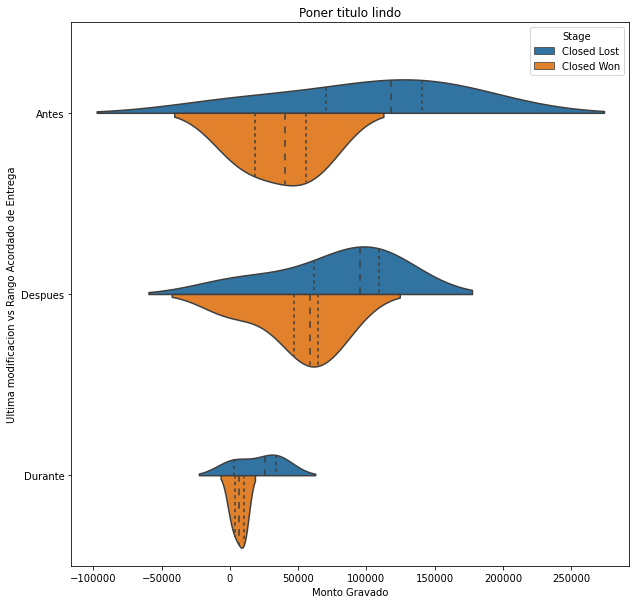

In [184]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (10, 10))
plt.title('Poner titulo lindo')
sns.violinplot( y='modified_in_time', x='time_modified_diff_sum', hue = 'Stage', data=by_region, split=True,  inner="quartile")

ax.set_xlabel('Monto Gravado')
ax.set_ylabel('Ultima modificacion vs Rango Acordado de Entrega')

Text(0, 0.5, 'Ultima modificacion vs Rango Acordado de Entrega')

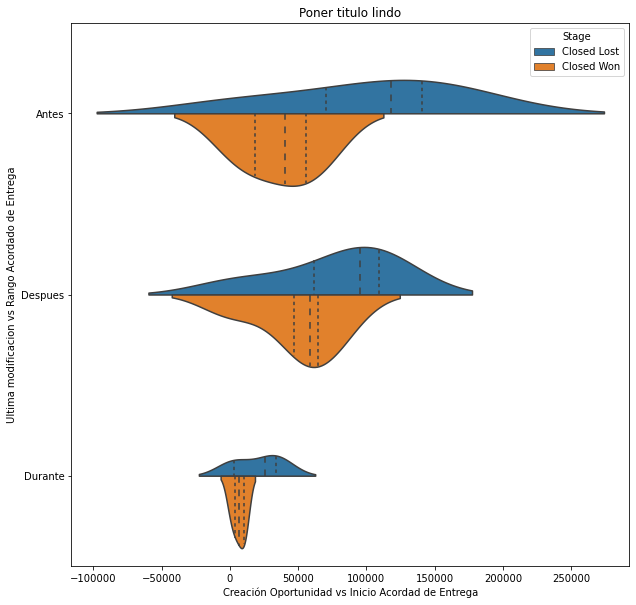

In [185]:
fig, ax = plt.subplots(figsize = (10, 10))
plt.title('Poner titulo lindo')
sns.violinplot( y='modified_in_time', x='time_modified_diff_sum', hue = 'Stage', data=by_region, split=True,  inner="quartile")

ax.set_xlabel('Creación Oportunidad vs Inicio Acordad de Entrega')
ax.set_ylabel('Ultima modificacion vs Rango Acordado de Entrega')